<div>
<div style="background:#263238;color:#fff;padding:1.3em 2em 1.5em 2em;border-radius: 5px;font-weight:bold;text-align:center">
    <strong>
        <h1 style = "color:#fff">CEMENT STRENGTH PREDICTION</h1>
    </strong>
</div>
<div style = "margin-top:1em">
    <img src = "https://www.creativefabrica.com/wp-content/uploads/2019/04/Vector-landscape-city-by-alexzel21-1-580x386.jpg" style="width : 100%"/>
</div>

# Problem Statement:
<p>To build a machine learning model to predict the concrete compressive strength of cement</p>

# Data Description :
Context
Concrete is the most used material for construction in the world! There are some components that should be combined to make the concrete. These components can affect the compressive strength of the concrete. To obtain the real compressive strength of concrete (target labels in the dataset), an engineer needs to break the cylinder samples under the compression-testing machine. The failure load is divided by the cylinder's cross-section to obtain the compressive strength. Engineers use different kinds of concretes for different building purposes. For example, the strength of concrete used for residential buildings should not be lower than 2500 psi (17.2 MPa). Concrete is a material with high strength in compression, but low strength in tension. That is why engineers use reinforced concrete (usually with steel rebars) to build structures.

Content
Given are the variable name, variable type, the measurement unit, and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.

<ul>
    <li>
        Cement
    </li>
    <li>
        Blast Furnace Slag
    </li>
    <li>
        Fly Ash
    </li>
    <li>
        Water
    </li>
    <li>
        Superplasticizer
    </li>
    <li>
        Coarse Aggregate
    </li>
    <li>
        Fine Aggregate
    </li>
    <li>
        Age
    </li>
    <li>
        Concrete compressive strength
    </li>
</ul>

Number of instances 1030<br/>
Number of Attributes 9<br/>
Attribute breakdown 8 quantitative input variables, and 1 quantitative output variable<br/>
Missing Attribute Values None

# Software Requirements and Platforms used:
<strong>OS : </strong> Windows
<br>
<strong>Platform : </strong> Google Collab
</div>

<div style="background:#263238;color:#fff;padding:1.3em 2em 1.5em 2em;border-radius: 5px;font-weight:bold">
    <strong>
        <h4 style = "color:#fff">1 | Importing the Required Packages</h4>
    </strong>
</div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor

from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings("ignore")

<div style="background:#263238;color:#fff;padding:1.3em 2em 1.5em 2em;border-radius: 5px;font-weight:bold">
    <strong>
        <h4 style = "color:#fff">2 | Reading the data</h4>
    </strong>
</div>

In [2]:
df = pd.read_csv("../input/regression-with-neural-networking/concrete_data.csv")

In [3]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


<div style="background:#263238;color:#fff;padding:1.3em 2em 1.5em 2em;border-radius: 5px;font-weight:bold">
    <strong>
        <h4 style = "color:#fff">3 | Understanding the data</h4>
    </strong>
</div>

In [4]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [5]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [6]:
corr = df.corr()
corr

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast Furnace Slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly Ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
Coarse Aggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
Fine Aggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
Strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


<AxesSubplot:>

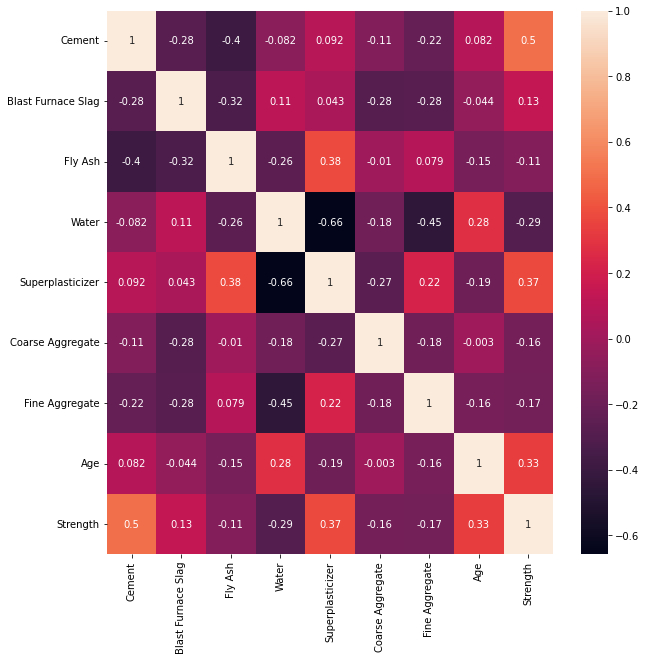

In [7]:
plt.figure(figsize = (10,10))
sns.heatmap(corr, annot = True)

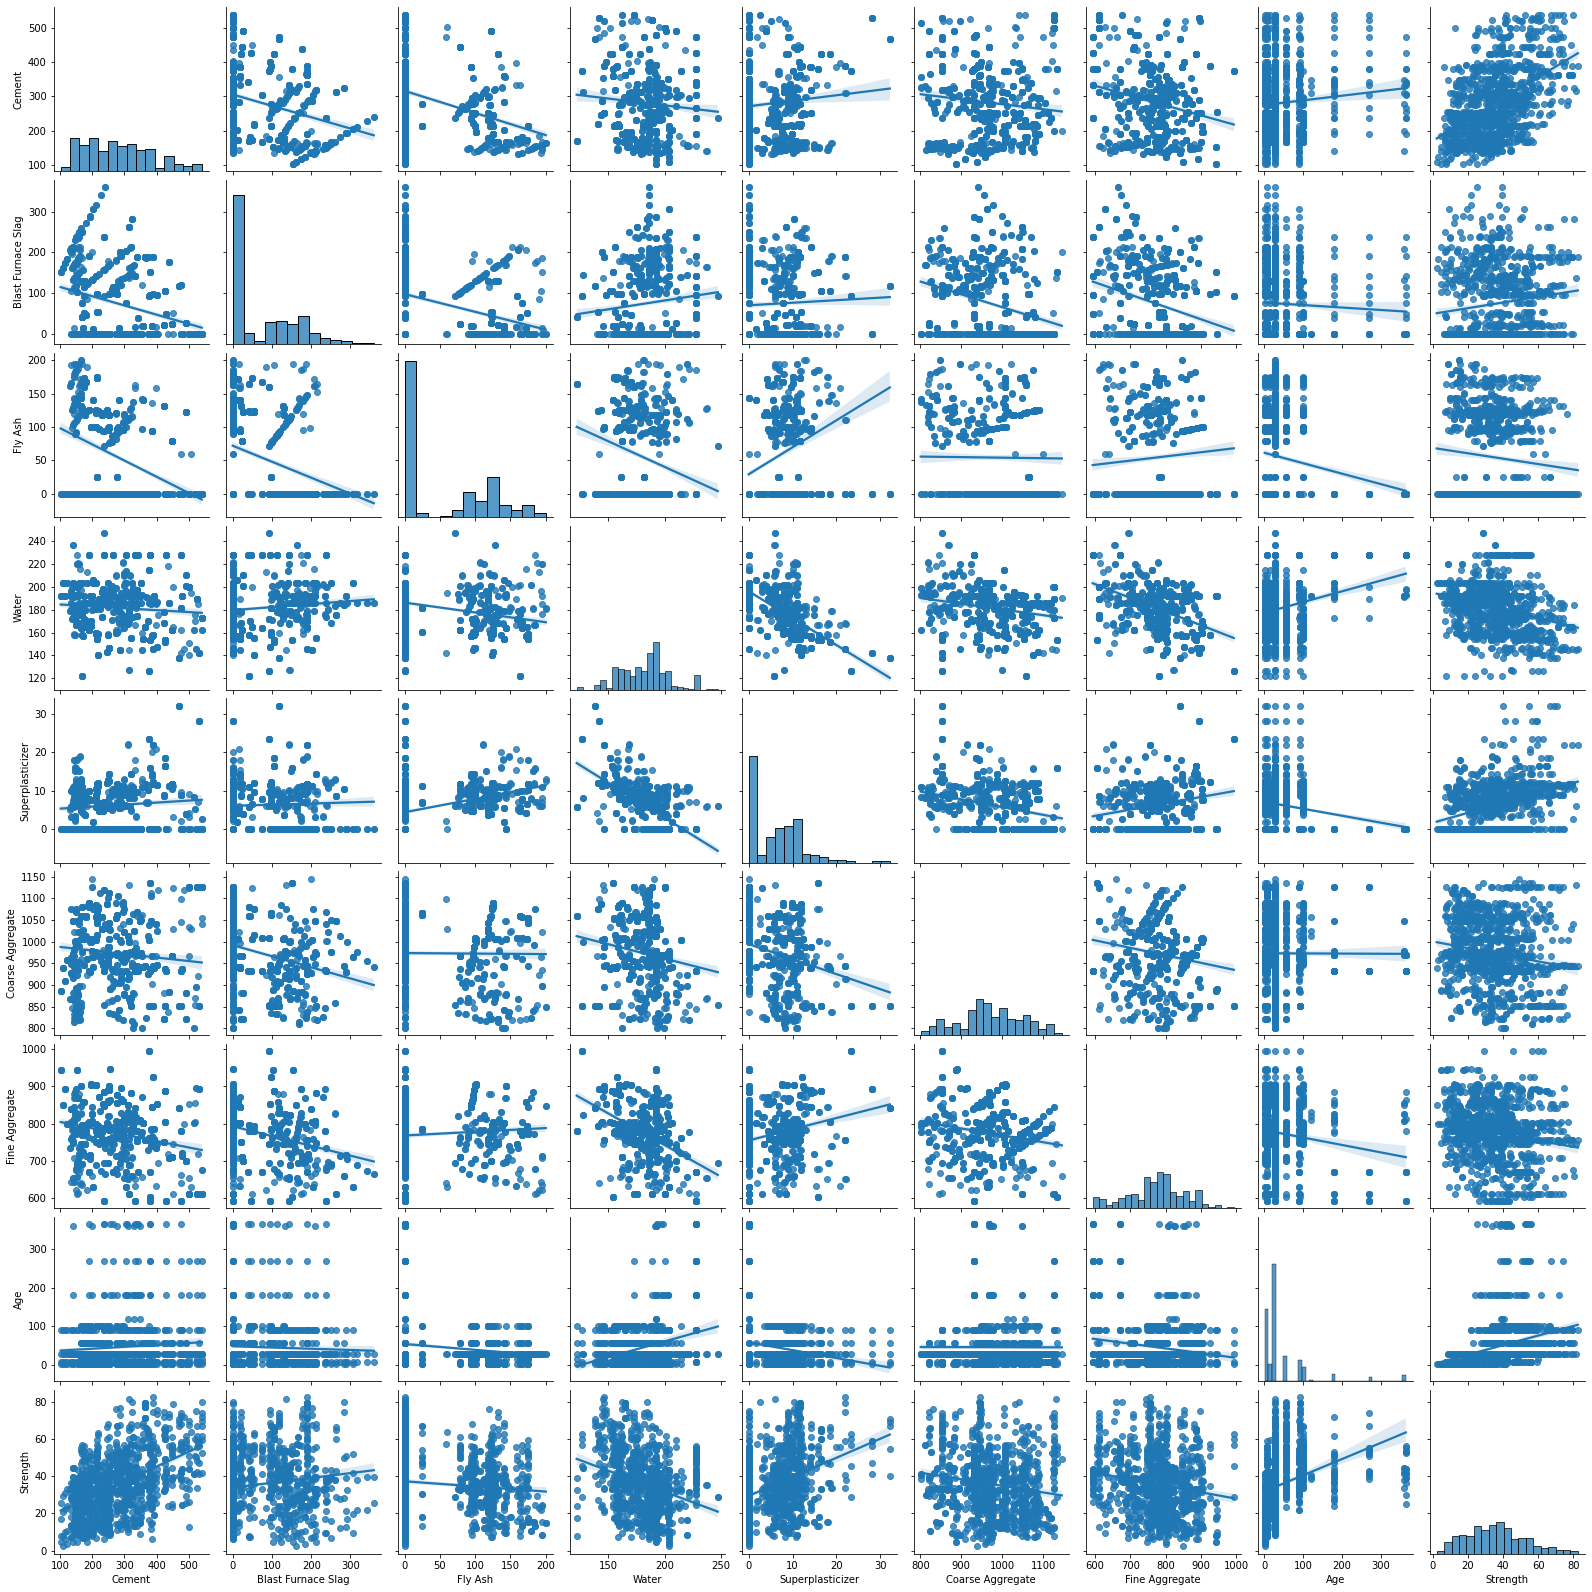

In [8]:
fig = sns.pairplot(df, kind = "reg")
fig.savefig("pairplot.png")

<div style="background:#263238;color:#fff;padding:1.3em 2em 1.5em 2em;border-radius: 5px;font-weight:bold">
    <strong>
        <h4 style = "color:#fff">4 | Cleaning the data</h4>
    </strong>
</div>

In [9]:
def remove_outlier(df, col_name):
    plt.figure(figsize=(20,20))
    f, axes = plt.subplots(1, 2,figsize=(12,4))
    sns.boxplot(df[col_name], ax=axes[0], color='skyblue').set_title("Before Outlier Removal: "+col_name)
    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    IQR = Q3-Q1
    df[col_name] = df[col_name].apply(lambda x : Q1-1.5*IQR if x < (Q1-1.5*IQR) else (Q3+1.5*IQR if x>(Q3+1.5*IQR) else x))
    sns.boxplot(df[col_name], ax=axes[1], color='pink').set_title("After Outlier Removal: "+col_name)
    print()
    plt.show()
    return df

<Figure size 1440x1440 with 0 Axes>

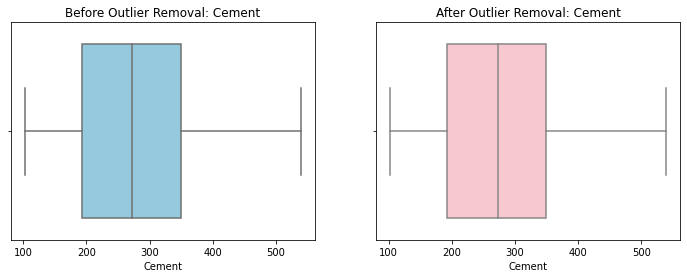

<Figure size 1440x1440 with 0 Axes>

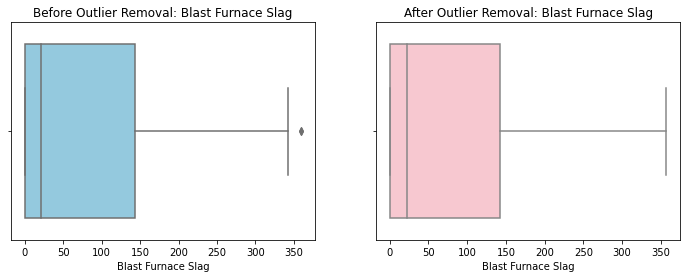

<Figure size 1440x1440 with 0 Axes>

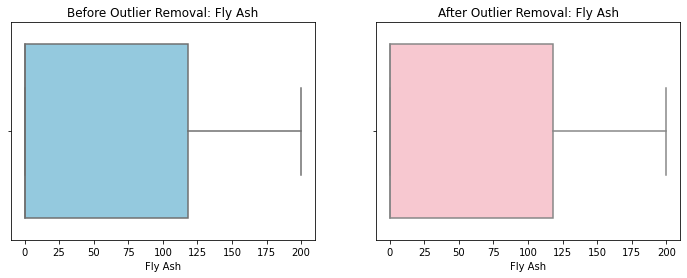

<Figure size 1440x1440 with 0 Axes>

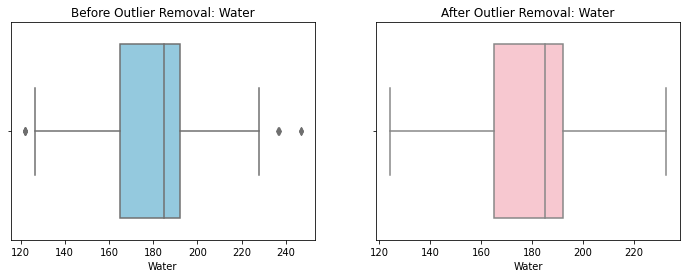

<Figure size 1440x1440 with 0 Axes>

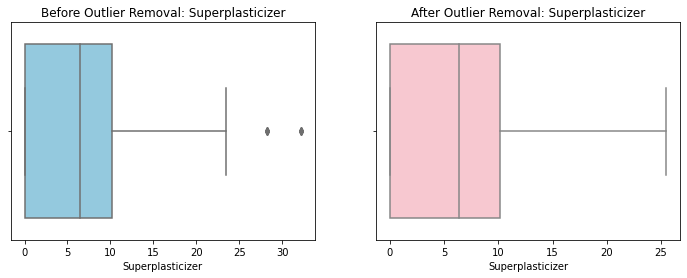

<Figure size 1440x1440 with 0 Axes>

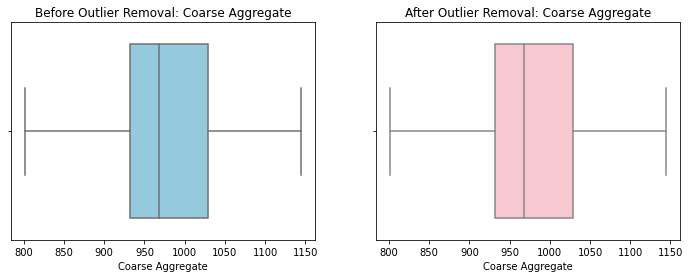

<Figure size 1440x1440 with 0 Axes>

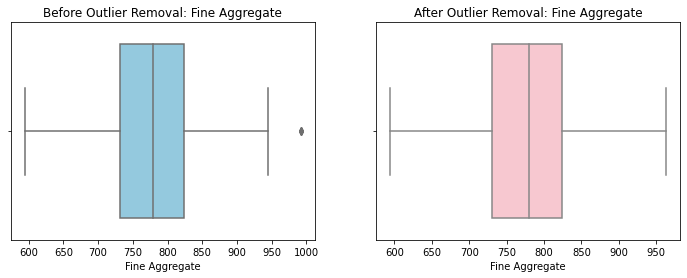

<Figure size 1440x1440 with 0 Axes>

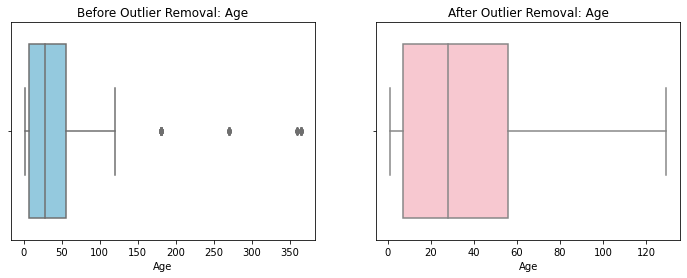

In [10]:
for col in df.select_dtypes(exclude="object").columns[:-1]:
    df = remove_outlier(df,col)

<div style="background:#263238;color:#fff;padding:1.3em 2em 1.5em 2em;border-radius: 5px;font-weight:bold">
    <strong>
        <h4 style = "color:#fff">5 | Defining the Target and Predictors Variables</h4>
    </strong>
</div>

In [11]:
X = df.drop("Strength", axis = 1).values
y = df["Strength"]

<div style="background:#263238;color:#fff;padding:1.3em 2em 1.5em 2em;border-radius: 5px;font-weight:bold">
    <strong>
        <h4 style = "color:#fff">6 | Splitting the dataset into train and test</h4>
    </strong>
</div>

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 4, test_size = 0.2)

In [13]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(824, 8) (824,) (206, 8) (206,)


<div style="background:#263238;color:#fff;padding:1.3em 2em 1.5em 2em;border-radius: 5px;font-weight:bold">
    <strong>
        <h4 style = "color:#fff">7 | Normalizing the data</h4>
    </strong>
</div>

In [14]:
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.fit_transform(X_test)

<div style="background:#263238;color:#fff;padding:1.3em 2em 1.5em 2em;border-radius: 5px;font-weight:bold">
    <strong>
        <h4 style = "color:#fff">8 | Building the model</h4>
    </strong>
</div>

In [15]:
def model_train(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("R2 Score :", r2_score(y_test, y_pred))
    print("Mean Squared Error :", mean_squared_error(y_test, y_pred))
    print("Root Mean Squared Error :", mean_squared_error(y_test, y_pred)**0.5)
    sns.regplot(y_test, y_pred)

### Linear Regression

R2 Score : 0.6946937864285301
Mean Squared Error : 92.37644594548381
Root Mean Squared Error : 9.611266615045272


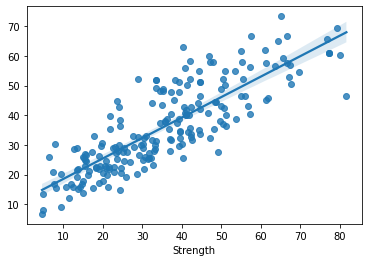

In [16]:
model_train(LinearRegression(), X_train, X_test, y_train, y_test)

### Support Vector Regressor

R2 Score : 0.690033143586035
Mean Squared Error : 93.78661580928905
Root Mean Squared Error : 9.68434901319077


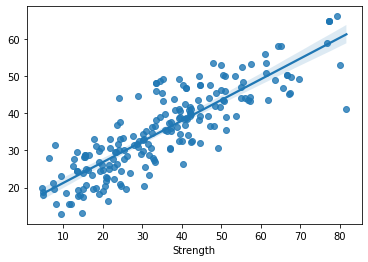

In [17]:
model_train(SVR(), X_train, X_test, y_train, y_test)

### Random Forest Regressor

R2 Score : 0.8661379131902288
Mean Squared Error : 40.5026274495975
Root Mean Squared Error : 6.364167459267355


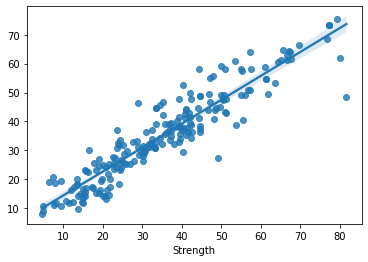

In [18]:
model_train(RandomForestRegressor(), X_train, X_test, y_train, y_test)

### XGBoost Regressor

R2 Score : 0.8505069455875651
Mean Squared Error : 45.23208649640806
Root Mean Squared Error : 6.725480391496808


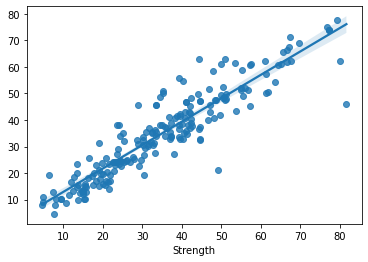

In [19]:
model_train(XGBRegressor(), X_train, X_test, y_train, y_test)

Random Forest Regressor has performed well for the dataset with an r-squared value of 87% ✨